In [1]:
import os
os.chdir("..")

In [2]:
## Test computation of the metrics
%load_ext autoreload
%autoreload 2

In [3]:
from be_great import GReaT

/home/dsar/miniconda3/envs/tobiasp39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
## Load a trained model for adult either this way or use some other way to load a model.
model = GReaT.load_from_dir("adult")  

## Test computation of the metrics

In [5]:
import pandas as pd
# Load the original data files
df_train = pd.read_csv("data/adult/adult_train.csv", index_col=0)[:2000] ## only use subsets to speed up this test.
df_test = pd.read_csv("data/adult/adult_test.csv", index_col=0)[:500]

It might be required to install some additional package for the metrics. Run:

```pip install sdv```

```pip install pomegranate```

In [6]:
from metrics import *

The data provider will return the corresponding real or generated datasets and is used as an interface to all our metrics.

In [7]:
dp = DataProvider(df_train, df_test, {"great": model})

Generating data for model great ...


2054it [00:14, 138.71it/s]                                                                                                                                                                   
556it [00:03, 142.92it/s]                                                                                                                                                                    


In [8]:
dp.get_full_data("original", train=False).shape

(500, 15)

## Discriminator metric

In [10]:
from sklearn.metrics import accuracy_score
disc_metric = DiscriminatorMetric(dp, accuracy_score, n_runs = 4)

In [12]:
metric_result = disc_metric("adult", "great")

In [13]:
metric_result

{'discriminator_mean': 0.6637500000000001,
 'discriminator_std': 0.002487468592766552}

## Machine Learning efficiency metric

In [18]:
from sklearn.ensemble import RandomForestClassifier
mle_metric = MLEfficiency(dp, RandomForestClassifier, accuracy_score)

In [19]:
mle_metric("adult", "great")

{'mle_scores': [0.838, 0.836, 0.838, 0.84, 0.836],
 'mle_mean': 0.8375999999999999,
 'mle_std': 0.0014966629547095778}

## Distance to closest record

In [33]:
dtcr_metric = DTCR(dp, n_samples=500)

In [34]:
metric_res = dtcr_metric("adult", "great")

(500, 15)


(0.0, 500.0)

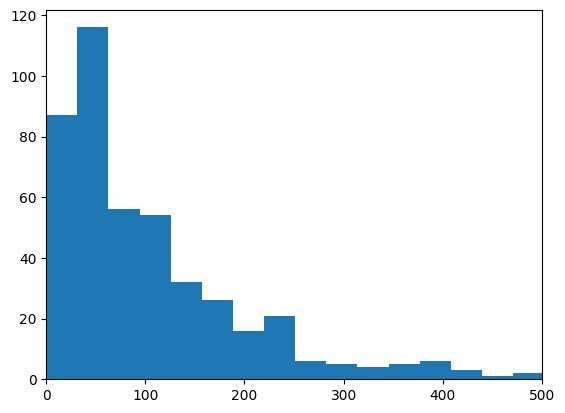

In [35]:
import matplotlib.pyplot as plt
plt.hist(metric_res["mins"], bins=1000)
plt.xlim([0,500])

In [40]:
import numpy as np
min_arr = np.array(metric_res["mins"])
print("Identical records: ", np.sum(min_arr==0), "of", len(min_arr))

Identical records:  11 of 500


In [ ]:
## Todo NLL metric

In [9]:
nll_met = NLLMetric(dp)

In [10]:
nll_met("adult", "great")

ImportError: Please install pomegranate with `pip install pomegranate`

In [11]:
from pomegranate import BayesianNetwork

ImportError: cannot import name 'BayesianNetwork' from 'pomegranate' (/home/dsar/miniconda3/envs/tobiasp39/lib/python3.9/site-packages/pomegranate/__init__.py)

## Test accuracy of GReaT.

In [ ]:
import numpy as np
df_test= df_test.apply(lambda x: (x if np.random.rand() > 0.5 else np.nan))

In [ ]:
df_test

In [ ]:
df_test_labels = df_test["income"].copy()
df_test["income"] = float("nan")

In [ ]:
df_test.

In [ ]:
df_synth_miss = model.impute(df_test, max_length=200, max_retries=10)

In [ ]:
df_synth_miss["income"]

In [ ]:
(df_test_labels[df_synth_miss.index] == df_synth_miss["income"]).mean()

In [ ]:
df_test = pd.read_csv("../great_private/data/adult/adult_test.csv", index_col=0)
df_test_labels = df_test["age"].copy()
df_test["age"] = float("nan")

In [ ]:
df_synth_miss = model.impute(df_test, max_length=200, max_retries=10)

In [ ]:
(df_test_labels[df_synth_miss.index] == df_synth_miss["age"]).mean()

In [ ]:
row = df_synth_miss.iloc[3]
row[pd.isna(row)].index

In [ ]:
import pandas as pd

In [ ]:
df_synth

In [ ]:
import numpy as np
def random_drop(df_in):
    """ Randomly drop some values. """
    df_out = df_in.copy()
    for clm in df_out.columns:
        df_out[clm]=df_out[clm].apply(lambda x: (x if np.random.rand() > 0.5 else np.nan))
    return df_out

In [ ]:
df_out

In [ ]:
df_synth_miss = random_drop(df_synth)
# Some edge cases
df_synth_miss.iloc[8] = np.nan
df_synth_miss = pd.concat((df_synth_miss, df_synth.iloc[[0]]), axis=0, ignore_index=True)

In [ ]:
df_synth_miss

In [ ]:
from great_utils import _partial_df_to_promts, _get_random_missing

In [ ]:
res_lists = _partial_df_to_promts(df_synth_miss)

In [ ]:
res_lists

In [ ]:
[len(res_lists[i]) for i in range(len(res_lists))]

In [ ]:
var = model.impute(df_synth_miss, max_length=200, max_retries=5)

In [ ]:
var

In [ ]:
len(df_list)

In [ ]:
df_list[2]

In [ ]:
model

In [ ]:
### Impute files

In [ ]:
for filename in ["imputation/df_test_2.txt"]:
    print(filename)
    df = pd.read_csv(filename, index_col=0)
    df.rename(columns = {'50K':'income', "education-num": "education_num"}, inplace = True)
    df_synth_miss = model.impute(df, max_length=200, max_retries=15)
    df_synth_miss=df_synth_miss.set_index(df.index)
    df_synth_miss.to_csv(filename[:-4]+ "_great_impute.txt")

In [ ]:
df_w_idx = df.copy().reset_index()

In [ ]:
unsucessful = df_w_idx.iloc[[2038, 4231]]

In [ ]:
unsucessful

In [ ]:
df_w_idx.iloc[[4229, 4230, 4231, 4232, 4233, 4234]]

In [ ]:
df_synth_miss.iloc[[4229, 4230, 4231, 4232, 4233, 4234]]

In [ ]:
res = model.impute(unsucessful.drop("index", axis=1), max_length=200, max_retries=1)

In [ ]:
res

In [ ]:
res.iloc[0]

In [ ]:
index = df.index.drop(2180).drop(4554)

In [ ]:
index

In [ ]:
2180 in index

In [ ]:
df_synth_miss_reindex = df_synth_miss.set_index(index)

In [ ]:
df_synth_miss_reindex.loc[2180] = res.iloc[0]

In [ ]:
df_synth_miss_reindex.loc[4554] = res.iloc[1]

In [ ]:
df_synth_miss_reindex.loc[2180]

In [ ]:
df_synth_miss_reindex = df_synth_miss_reindex.sort_index(ascending=True)
df_synth_miss_reindex.to_csv("imputation/df_test_2_great_impute.txt")

## Imputation for group 2

In [ ]:
for filename in ["imputation/to_impute_great_shap.csv", "imputation/to_impute_great_lime.csv"]:
    print(filename)
    df = pd.read_csv(filename) # Introduces new index.
    #df.rename(columns = {'50K':'income', "education-num": "education_num"}, inplace = True)
    
    dfclone = df.copy().drop(["rank", "index"], axis=1)
    # We dont know the label, but we would require a new model to impute only other features, so we impute it as well and drop it again
    dfclone["income"] = np.nan # 

    df_synth_miss = model.impute(dfclone, max_length=200, max_retries=10)
    df_synth_miss.drop(["income"], axis=1)
    # Append old columns again. Careful, some imputatitions may have failed...
    df_synth_miss = pd.concat((df.loc[df_synth_miss.index, ["rank", "index" , "income"]], df_synth_miss), axis=1)
    
    #df_synth_miss=df_synth_miss.set_index(df.index)
    df_synth_miss.to_csv(filename[:-4]+ "_imputed.csv", index=False)